In [106]:
import pandas as pd
import numpy as np
import nltk
import re

In [107]:
df=pd.read_csv("spam.csv",encoding='latin-1')

In [108]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [109]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [110]:
df = df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'})

In [111]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [112]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [113]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [114]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [115]:
target_mapping = {'ham':0, 'spam':1}
df['target'] = df['target'].map(target_mapping)

In [116]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [117]:
# also use this method
#from sklearn.preprocessing import LabelEncoder
# ecoder = LabelEncoder()
# df['target'] = ecoder.fit_transform(df['target'])

In [118]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [119]:
df.duplicated().sum()

403

In [120]:
df = df.drop_duplicates(keep='first')

In [121]:
df.shape

(5169, 2)

In [122]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

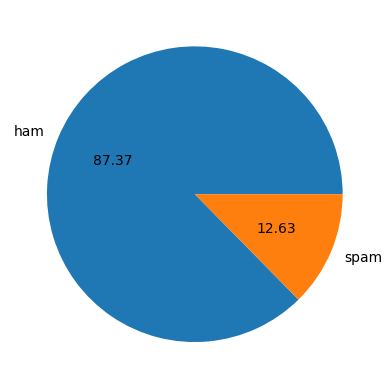

In [123]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [124]:
import nltk


In [125]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [126]:
df['character'] = df['text'].apply(len)

C:\Users\sunda\AppData\Local\Temp\ipykernel_11932\2189058819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['character'] = df['text'].apply(len)


In [127]:
df.head()

,target,text,character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [128]:
df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\sunda\AppData\Local\Temp\ipykernel_11932\4140123077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [129]:
df

,target,text,character,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [130]:
df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\sunda\AppData\Local\Temp\ipykernel_11932\2759963513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [131]:
df.head()

,target,text,character,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [132]:
df.describe()

,target,character,words,sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [133]:
df[df['target']==0][['character','words', 'sentences']].describe()

,character,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [134]:
df[df['target']==1][['character','words', 'sentences']].describe()

,character,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [135]:
import seaborn as sns


<Axes: ylabel='Count'>

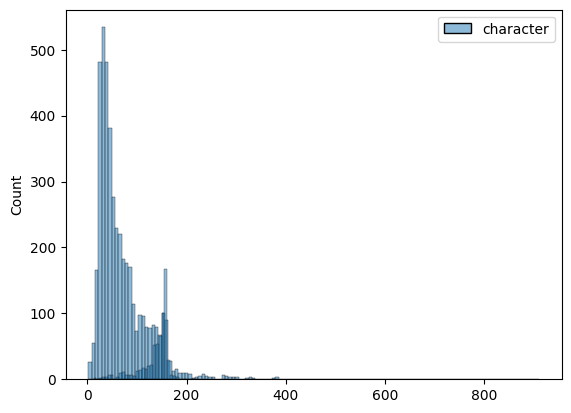

In [136]:
sns.histplot(df[df['target']==0][['character']])
sns.histplot(df[df['target']==1][['character']],color='green')

<Axes: ylabel='Count'>

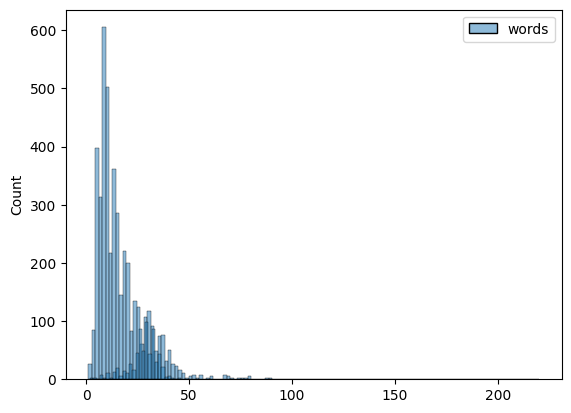

In [137]:
sns.histplot(df[df['target']==0][['words']])
sns.histplot(df[df['target']==1][['words']],color='green')

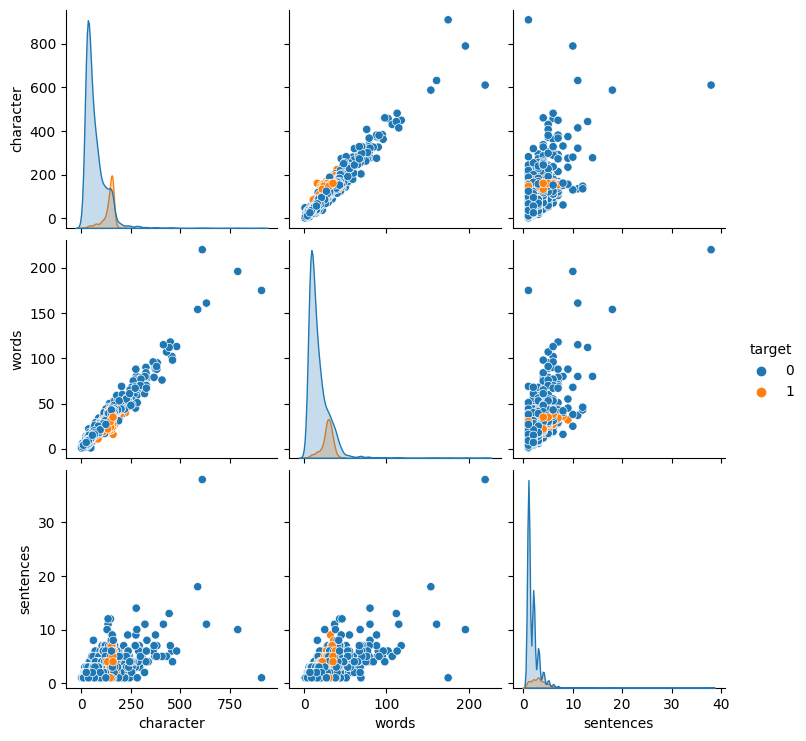

In [138]:
sns.pairplot(df,hue='target')

In [139]:
# Data preprocessing
# lowe case
# tokenzation
# removeing special character
# removeing stopwords and punctuation
# stemming

In [140]:
import string
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [141]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [142]:
text_transform("I loved youtube lecture on machine learning. how's about you ?")

'love youtub lectur machin learn'

In [143]:
df['text_transformed']=df['text'].apply(text_transform)

C:\Users\sunda\AppData\Local\Temp\ipykernel_11932\1488060307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_transformed']=df['text'].apply(text_transform)


In [144]:
df.head()

,target,text,character,words,sentences,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [145]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color = 'white')

In [146]:
spam_wc= wc.generate(df[df['target']==1]['text_transformed'].str.cat(sep=" "))

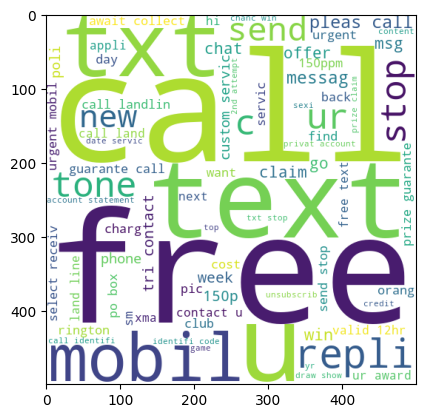

In [147]:
plt.imshow(spam_wc)

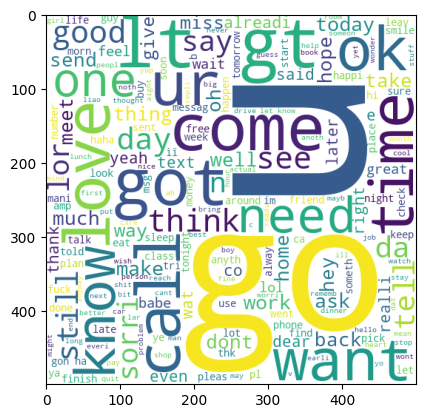

In [148]:
ham_wc= wc.generate(df[df['target']==0]['text_transformed'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [149]:
spam_corpus=[]
for msg in df[df['target']==1]['text_transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [150]:
len(spam_corpus)

9939

In [151]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [152]:
x = tf.fit_transform(df['text_transformed']).toarray()

In [153]:
x.shape

(5169, 6708)

In [154]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [155]:
y = df['target'].values

In [156]:
from sklearn.model_selection import train_test_split


In [157]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [158]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [159]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [160]:
gnb.fit(x_train,y_train)

GaussianNB()

In [161]:
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [162]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [163]:
bnb.fit(x_train,y_train)
y_pred2 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [167]:
import pickle
pickle.dump(tf,open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl', 'wb'))

In [169]:
df['text'][4]

"Nah I don't think he goes to usf, he lives around here though"